<h1>Indian Candidates for General Election 2019 Analysis & Prediction of winning</h1>
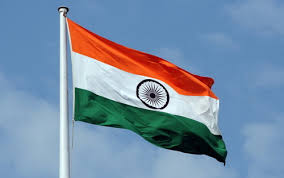
<h2>Description</h2>
<p>With over 600 Million voters voting for 8500+ candidates across 543 constituencies, the general elections in the world's largest democracy are a potential goldmine of data. While there are existing separate datasets about the votes each candidate received and the personal information of each candidate, there was no comprehensive dataset that included both these information. Thus, this dataset will provide more usability than most existing datasets in this domain.</p>
<h2>Inspiration of Dataset Author</h2>
<p>There are 2 main tasks that can be performed on this dataset: Exploratory Data Analytics to visualize the impact of each feature of the candidate and the use of machine learning to predict the chances of winning of a candidate.</p>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
election_df=pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
election_df.head()

In [ ]:
for i in election_df.columns:
    x=i.lower().replace(' ','_').replace('\n','_').replace('__','_')
    election_df=election_df.rename(columns={i:x})

In [ ]:
election_df.info()

<h1>EDA</h1>

<ul>
    <li>number of states?,number of constituencies in each state?</li>
    <li>number of candidates in each state</li>
    <li>percentage of winners and losers</li>
    <li>Age distribution of candidates</li>
    <li>number of parties participate in the election</li>
    <li>The percentage of participation of each party in each state</li>
    <li>Percaentage of males and females in 2019 election</li>
    <li>winner women in 2019 election</li>
    <li>states that have women winners</li>
    <li>Percentage of each edcational level of the participants in 2019 election</li>
    <li>How many participant have a certain edcational level win, this question could give us an indicator if people in india choose participants who have higher educational background or not.</li>  
    <li>Compare between assets and liabilities of the winners</li>

In [ ]:
print('number of indian states: ',len(election_df['state'].unique()))

<p>India is a federal union comprising 28 states and 8 union territories, for a total of 36 entities. The states and union territories are further subdivided into districts and smaller administrative divisions.</p>
<a href='https://en.wikipedia.org/wiki/States_and_union_territories_of_India'>wikipedia</a>

In [ ]:
states=[]
num_constituency=[]
for i in election_df['state'].unique():
    states.append(i)
    num_constituency.append(len(election_df[election_df['state']==i]['constituency'].unique()))
plt.figure(figsize=(20,8))
plt.bar(x=states,height=num_constituency)
plt.xlabel('states')
plt.ylabel('number of constituencies')
plt.title('number of constituencies in indian states in 2019')
plt.xticks(rotation=90)
plt.show()

<p>We can predict that as the number of constituencies increases, the Area and the density of citizens increase.</p>

In [ ]:
states=[]
num_candidates=[]
for i in election_df['state'].unique():
    states.append(i)
    num_candidates.append(len(election_df[election_df['state']==i]['name'].unique()))
plt.figure(figsize=(20,8))
plt.bar(x=states,height=num_candidates)
plt.xlabel('states')
plt.ylabel('number of candidates')
plt.title('number of candidates in indian states in 2019')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
election_df['winner'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('percentage of winners and losers')
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(election_df['age'])
plt.axvline(election_df['age'].mean(),color='red',label='mean')
plt.axvline(election_df['age'].median(),color='blue',label='median')
plt.axvline(election_df['age'].std(),color='green',label='std')
plt.legend()
plt.show()

<p>distribtion of ages approximately normal distribution</p>

In [ ]:
print('number of parties: ',len(election_df['party'].unique()))

<p>the total number of parties registered was 2599, with 8 national parties, 53 state parties and 2538 unrecognised parties.</p>
<a href='https://en.wikipedia.org/wiki/List_of_political_parties_in_India'>Wikipedia</a>

In [ ]:
election_df['party'].value_counts()

<p>biggest 5 parties in 2019 election is BJP, INC, NOTA, IND, BSP</p>

In [ ]:
plt.figure(figsize=(15,8))
election_df['gender'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('percentage of males and females')
plt.ylabel('')
plt.show()

In [ ]:
women_only=election_df[election_df['gender']=='FEMALE']
women_only['winner'].value_counts().plot.bar()
plt.show()

In [ ]:
print('75 women succeded from ',str(len(women_only)))

In [ ]:
for i in women_only['state'].unique():
    print('state is : ',i)
    c=women_only[women_only['state']==i]
    for j,k,z in zip(c['name'],c['winner'],c['constituency']):
        if k==1:
            print('winner woman: ',j,' constituency: ',z)

In [ ]:
election_df['education']=election_df['education'].str.replace('\n','')

In [ ]:
plt.figure(figsize=(15,8))
election_df['education'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Percentage of each edcational level of the participants in 2019 election')
plt.ylabel('')
plt.show()

In [ ]:
for i in election_df['education'].unique():
    print('edcational level: ',i)
    c=election_df[election_df['education']==i]
    total=len(c)
    winners=0
    for j in c['winner']:
        if j==1:
            winners+=1
    if total>0:
        print(winners/total)

<p>We can say that most of winners have a higher edcational background, people loves those people.</p>  

In [ ]:
def change_val(x):
    try:
        c = (x.split('Rs')[1].split('\n')[0].strip())
        c_2 = ''
        for i in c.split(","):
            c_2 = i+c_2
        return c_2
    except:
        x = 0
        return x
election_df['assets'] = election_df['assets'].apply(change_val).astype('int')
election_df['liabilities'] = election_df['liabilities'].apply(change_val).astype('int')

In [ ]:
winner_only=election_df[election_df['winner']==1]
comp_dict={}
for i,j,k in zip(winner_only['name'],winner_only['assets'],winner_only['liabilities']):
    comp_dict[i]=j-k
print(comp_dict)

<h1>Data Cleaning</h1>

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import backend as K

In [ ]:
x=election_df.drop('winner',axis=1)
y=election_df['winner']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

In [ ]:
cols_to_remove=['name','general_votes','postal_votes','over_total_electors_in_constituency','over_total_votes_polled_in_constituency','total_electors']
x_train=x_train.drop(cols_to_remove,axis=1)
x_test=x_test.drop(cols_to_remove,axis=1)

In [ ]:
def replacing(x):
    if x=='Not Available':
        x=x.replace('Not Available','0')
        x=int(x)
    else:
        return x
    return x
def convert_nan(x):
    if x==0:
        return np.nan
    else:
        return x 
    
x_train['criminal_cases']=x_train['criminal_cases'].apply(replacing).apply(convert_nan)
x_test['criminal_cases']=x_test['criminal_cases'].apply(replacing).apply(convert_nan)
x_train['criminal_cases']=x_train['criminal_cases'].astype('float')
x_test['criminal_cases']=x_test['criminal_cases'].astype('float')

In [ ]:
for i,j in zip(x_train.columns,x_test.columns):
    if x_train[i].dtype=='object':
        x_train[i]=x_train[i].str.lower()
    if x_test[j].dtype=='object':
        x_test[j]=x_test[j].str.lower()

In [ ]:
x_train['age']=x_train['age'].fillna(x_train['age'].median())
x_test['age']=x_test['age'].fillna(x_test['age'].median())
x_train['symbol']=x_train['symbol'].fillna('Unknown')
x_test['symbol']=x_test['symbol'].fillna('Unknown')

In [ ]:
x_train['category']=x_train['category'].fillna('Unknown')
x_test['category']=x_test['category'].fillna('Unknown')
x_train['education']=x_train['education'].fillna('Not Available')
x_test['education']=x_test['education'].fillna('Not Available')

In [ ]:
x_train['gender']=x_train['gender'].fillna('Unknown')
x_test['gender']=x_test['gender'].fillna('Unknown')
x_train['assets']=x_train['assets'].fillna(0)
x_test['assets']=x_test['assets'].fillna(0)

In [ ]:
x_train['liabilities']=x_train['liabilities'].fillna(0)
x_test['liabilities']=x_test['liabilities'].fillna(0)
x_train['criminal_cases']=x_train['criminal_cases'].fillna(0)
x_test['criminal_cases']=x_test['criminal_cases'].fillna(0)

<h1>Preprocessing & Feature Engineering</h1>

<h2>Categorical Variables</h2>

In [ ]:
#Check categorical columns for cardinality
for i in x_train.columns:
    if x_train[i].dtype=='object':
        print(i,': ',str(len(x_train[i].unique())))

In [ ]:
object_cols = [col for col in x_train.columns if x_train[col].dtype == "object"]
numeric_cols=[col for col in x_train.columns if x_train[col].dtype !='object']

In [ ]:
low_card_cols = [col for col in object_cols if x_train[col].nunique() < 130]
high_card_cols = list(set(object_cols)-set(low_card_cols))

In [ ]:
OH_encoder=OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(x_train[low_card_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(x_test[low_card_cols]))
OH_cols_train.index = x_train.index
OH_cols_test.index = x_test.index
x_train = x_train.drop(low_card_cols, axis=1)
x_test = x_test.drop(low_card_cols, axis=1)

# Add one-hot encoded columns to numerical features
x_train = pd.concat([x_train, OH_cols_train], axis=1)
x_test = pd.concat([x_test, OH_cols_test], axis=1)

In [ ]:
good_label_cols=[i for i in high_card_cols if set(x_train[i])==set(x_test[i])]
bad_label_cols=list(set(high_card_cols)-set(good_label_cols))

In [ ]:
bad_label_cols

In [ ]:
good_label_cols

In [ ]:
x_train=x_train.drop('constituency',axis=1)
x_test=x_test.drop('constituency',axis=1)

In [ ]:
for i in numeric_cols:
    x_train[i]=((x_train[i]-x_train[i].min())/(x_train[i].max()-x_train[i].min()))
    x_test[i]=((x_test[i]-x_test[i].min())/(x_test[i].max()-x_test[i].min()))

<h1>Model Selection</h1>

In [ ]:
def select_model():
    models=[{
        'name':'LogisticRegression',
        'estimator':LogisticRegression(),
        'hyperparameters':{
            'solver':["newton-cg", "lbfgs", "liblinear"]
        }
    },
    {
        'name':'KNeighborsClassifier',
        'estimator':KNeighborsClassifier(),
        'hyperparameters':{
            "n_neighbors": range(1,20,2),
            "weights": ["distance", "uniform"],
            "algorithm": ["ball_tree", "kd_tree", "brute"],
            "p": [1,2]
        }
    },
    {
        'name':'RandomForestClassifier',
        'estimator':RandomForestClassifier(),
        'hyperparameters':{
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
        }
    }
        
    ]
    for i in models:
        print(i['name'])
        grid=GridSearchCV(i['estimator'],
                          param_grid=i['hyperparameters'],
                          cv=10,
                          scoring='roc_auc')
        grid.fit(x_train,y_train)
        i["best_params"] = grid.best_params_
        i["best_score"] = grid.best_score_
        i["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(i["best_score"]))
        print("Best Parameters: {}\n".format(i["best_params"]))

    return models

select_model()

<h1>Train and Predict</h1>

In [ ]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [ ]:
print('roc_auc_score is ',roc_auc_score(y_test,pred))